In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

c:\users\shris\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [7]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.mnist.load_data() 

In [4]:
X_train=X_train.reshape((60000, 28, 28,1))
X_train=X_train.astype('float32')/255

In [6]:
X_test=X_test.reshape((10000, 28, 28,1))
X_test=X_test.astype('float32')/255

In [8]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [24]:
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [21]:
 model.summary()
    

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

In [25]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [26]:
model.fit(X_train, y_train, epochs=5, batch_size = 64)

Epoch 1/5
938/938 [==============================] - 52s 53ms/step - loss: 0.1644 - accuracy: 0.9487
Epoch 2/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0452 - accuracy: 0.9858
Epoch 3/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0320 - accuracy: 0.9900
Epoch 4/5
938/938 [==============================] - 45s 48ms/step - loss: 0.0234 - accuracy: 0.9929
Epoch 5/5
938/938 [==============================] - 46s 49ms/step - loss: 0.0188 - accuracy: 0.9942


In [28]:
model.evaluate(X_test, y_test)[1]


313/313 [==============================] - 4s 13ms/step - loss: 0.0239 - accuracy: 0.9927


0.9926999807357788

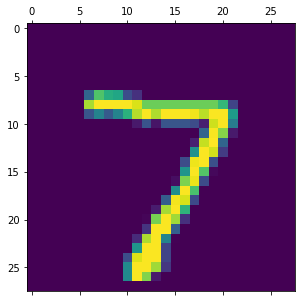

In [29]:
plt.matshow(X_test[0])

In [30]:
predict=model.predict(X_test)


313/313 [==============================] - 6s 18ms/step


In [31]:
predict[0]

array([1.00540195e-13, 1.40971332e-10, 4.25252250e-10, 2.57093569e-10,
       4.91126029e-10, 2.13128577e-11, 2.31643796e-15, 1.00000000e+00,
       3.57715330e-10, 7.01967107e-09], dtype=float32)

In [32]:
np.argmax(predict[0])

7

In [35]:
y_predicted=model.predict(X_test)


313/313 [==============================] - 6s 18ms/step


In [36]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]